In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

## Tempura

In [99]:
inputs_dir = "/projects/robustmicrob/jlaw/inputs"
tempura_file = Path(inputs_dir, "ogt_sources/tempura/200617_TEMPURA.csv")
df_tempura = pd.read_csv(tempura_file).ffill()
df_tempura['genus_and_species'] = df_tempura['genus_and_species'] + ' ' + df_tempura['strain'] 
df_tempura = df_tempura[['genus_and_species', 'taxonomy_id', 'Tmax', 'Tmin', 'Topt_ave']]
df_tempura.columns = ['species', 'taxon_id', 'Tmax', 'Tmin', 'Topt']
df_tempura['source'] = 'tempura'
# df = df.replace('', np.nan).dropna(subset='Temperature')
df_tempura.head(10)

,species,taxon_id,Tmax,Tmin,Topt,source
0,Methanopyrus kandleri 116,2320,122.0,85.0,100.0,tempura
1,"""Geogemma barossii"" 121",1927912,121.0,85.0,106.0,tempura
2,Pyrolobus fumarii 1A,54252,113.0,90.0,106.0,tempura
3,Pyrococcus kukulkanii NCB100,1609559,112.0,70.0,105.0,tempura
4,Methanopyrus kandleri AV19,2320,110.0,84.0,98.0,tempura
5,Pyrodictium brockii S1,35616,110.0,80.0,105.0,tempura
6,Pyrodictium occultum PL-19,2309,110.0,82.0,105.0,tempura
7,Pyrodictium abyssi AV2,54256,110.0,80.0,97.0,tempura
8,Pyrococcus yayanosii CH1,1008460,108.0,80.0,98.0,tempura
9,Hyperthermus butylicus DSM 5456,54248,108.0,72.0,100.5,tempura


<AxesSubplot: >

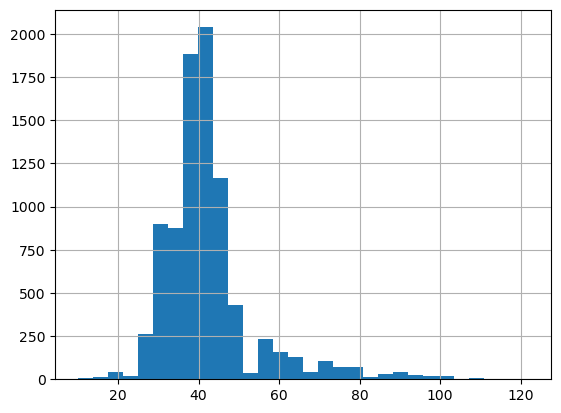

In [38]:
df_tempura.Tmax.hist(bins=30)

## ThermoBase

In [100]:
thermobase_file = Path(inputs_dir, "ogt_sources/thermobase/ThermoBase_ver_1.0_2022.csv")
df_tb = pd.read_csv(thermobase_file)
df_tb = df_tb.replace('', np.nan).dropna(subset=['Taxonomic ID', 'Max. Temp. (°C)'])
df_tb = df_tb[['Name', 'Taxonomic ID', 'Max. Temp. (°C)', 'Min. Temp. (°C)', 'Avg. Optimum Temp (°C)']]
df_tb.columns = ['species', 'taxon_id', 'Tmax', 'Tmin', 'Topt']
df_tb['taxon_id'] = df_tb['taxon_id'].astype(int)
df_tb = df_tb.groupby('taxon_id').max()
df_tb['source'] = 'thermobase'
df_tb.head(10)

,species,Tmax,Tmin,Topt,source
taxon_id,,,,,
128,Isosphaera pallida,55.0,34.0,41.0,thermobase
271,Thermus aquaticus,79.0,40.0,70.0,thermobase
274,Thermus thermophilus,85.0,47.0,68.5,thermobase
276,Thermus filiformis,80.0,37.0,73.0,thermobase
405,Methylobacillus flagellatus,52.0,10.0,42.0,thermobase
929,Thermithiobacillus tepidarius,52.0,20.0,44.0,thermobase
1050,Thermochromatium tepidum,57.0,34.0,49.0,thermobase
1086,Rhodothalassium salexigens,45.0,20.0,40.0,thermobase
1087,Rhodovibrio salinarum,45.0,20.0,40.0,thermobase


In [7]:
df_tb.columns

Index(['Name', 'Taxonomic ID', 'Domain', 'Phylum', 'Class', 'Order', 'Family',
       'Ecosystem', 'Environment', 'Energy Source', 'Metabolism',
       'Extended Metabolism', 'Ion for Chemiosmosis', 'Oxygen Requirement',
       'Min. pH', 'Max. pH', 'Avg. Opt. pH', 'Min. Temp. (°C)',
       'Max. Temp. (°C)', 'Avg. Optimum Temp (°C)',
       'Pressure for Opt. Temp. (kpa)', 'Optimum Pressure (Mpa) ',
       'Avg. Opt. salinity (%)', 'Note', 'Source', 'Additional_source',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Un

<AxesSubplot: >

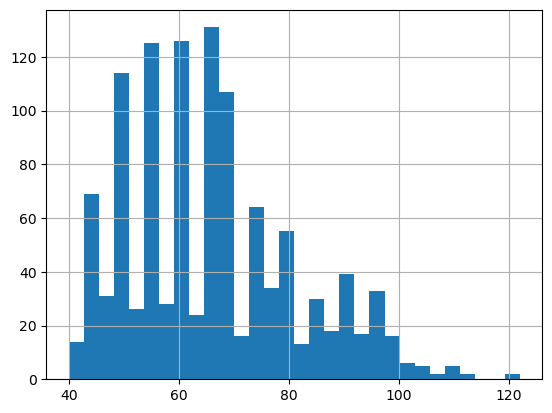

In [85]:
df_tb['Tmax'].hist(bins=30)

In [62]:
df_tempura.head(2)

,species,taxon_id,strain,Tmax,Tmin,Topt
0,Methanopyrus kandleri,2320,116,122.0,85.0,100.0
1,"""Geogemma barossii""",1927912,121,121.0,85.0,106.0


In [63]:
df_tb.head(2)

,species,taxon_id,Tmax,Tmin,Topt
0,Methanopyrus kandleri 116,2320,122.0,90.0,105.0
1,Geogemma barossii 121,1927912,121.0,85.0,106.0


In [87]:
# try combining them
tempura_ids = set([int(x) for x in df_tempura.taxon_id.values])
tb_ids = set([int(x) for x in df_tb.index.values])
print(len(tempura_ids), len(tb_ids), len(tempura_ids & tb_ids))
tb_unique_ids = tb_ids - tempura_ids
print(len(tb_unique_ids))

8638 1152 859
293


In [259]:
df_merged[df_merged.Tmax > 50]

,species,Tmax,Tmin,Topt,source
taxon_id,,,,,
14,Dictyoglomus thermophilum H‐6‐12,80.0,50.0,78.0,tempura
128,Isosphaera pallida IS1B,55.0,34.0,41.0,tempura
154,Spirochaeta thermophila Z-1203,73.0,40.0,67.0,tempura
271,Thermus aquaticus YT-1,79.0,40.0,70.0,tempura
274,Thermus thermophilus HB8,85.0,47.0,68.5,tempura
...,...,...,...,...,...
2758568023,Thermococcus gorgonarius W-12,95.0,68.0,84.0,thermobase
2758568024,Thermococcus siculi RG-20,93.0,50.0,85.0,thermobase
2758568025,Thermococcus pacificus P-4,95.0,70.0,84.0,thermobase


In [101]:
df_merged = pd.concat([df_tempura, df_tb[df_tb.index.isin(tb_unique_ids)].reset_index()])
df_merged

,species,taxon_id,Tmax,Tmin,Topt,source
0,Methanopyrus kandleri 116,2320,122.0,85.0,100.0,tempura
1,"""Geogemma barossii"" 121",1927912,121.0,85.0,106.0,tempura
2,Pyrolobus fumarii 1A,54252,113.0,90.0,106.0,tempura
3,Pyrococcus kukulkanii NCB100,1609559,112.0,70.0,105.0,tempura
4,Methanopyrus kandleri AV19,2320,110.0,84.0,98.0,tempura
...,...,...,...,...,...,...
288,Thermococcus gorgonarius W-12,2758568023,95.0,68.0,84.0,thermobase
289,Thermococcus siculi RG-20,2758568024,93.0,50.0,85.0,thermobase
290,Thermococcus pacificus P-4,2758568025,95.0,70.0,84.0,thermobase
291,Thermococcus barossii SHCK-94,2758568026,92.0,60.0,82.5,thermobase


In [189]:
df_merged = df_merged.groupby('taxon_id').min().reset_index()

In [190]:
df_merged.to_csv(Path(inputs_dir, "ogt_sources/merged.csv"), index=None)

I downloaded the proteome IDs for these species using a script.

Now download the uniprot IDs for these proteomes

In [194]:
ref_prot_file = f"{inputs_dir}/ogt_sources/merged/species_proteomes4.tsv"
other_prot_file = f"{inputs_dir}/ogt_sources/merged/species_proteomes_other4.tsv"
proteome_data = pd.read_table(ref_prot_file, names=['orig_taxon_id', 'proteome_id', 'organism', 'taxon_id', 'num_prots'])
proteome_data_other = pd.read_table(other_prot_file, names=['orig_taxon_id', 'proteome_id', 'organism', 'taxon_id', 'num_prots'])
proteome_data['type'] = 'reference'
proteome_data_other['type'] = 'other'
print(len(proteome_data), len(proteome_data_other))
proteome_data = pd.concat([proteome_data, proteome_data_other])
print(len(proteome_data))
proteome_data.head(2)

840 2653
3493


,orig_taxon_id,proteome_id,organism,taxon_id,num_prots,type
0,2320,UP000001826,Methanopyrus kandleri (strain AV19 / DSM 6324 ...,190192,1687,reference
1,54252,UP000001037,Pyrolobus fumarii (strain DSM 11204 / 1A),694429,1967,reference


In [195]:
proteome_data = proteome_data[proteome_data.num_prots > 500]

In [197]:
proteome_data['taxon_id'].value_counts()

2209       58
371601     19
1890302    17
37636      14
488447     12
           ..
518766      1
29549       1
79269       1
291989      1
1344584     1
Name: taxon_id, Length: 2825, dtype: int64

In [121]:
# proteome_data = proteome_data[proteome_data.orig_taxon_id.astype(str).isin(df_merged.taxon_id.astype(str))]
# print(len(proteome_data))

30159


In [198]:
# # for proteomes with duplicate species, choose a proteome with an average # proteins
proteome_data = proteome_data.sort_values('num_prots', ascending=False)
representatives = proteome_data[['taxon_id', 'proteome_id']].groupby(['taxon_id'])['proteome_id'].agg(lambda x: x[int(len(x) / 2)] if isinstance(x, np.ndarray) else x)

representatives = representatives.apply(lambda x: x[int(len(x) / 2)] if isinstance(x, np.ndarray) else x)
print(len(representatives))
proteome_data = proteome_data[proteome_data['proteome_id'].isin(representatives.reset_index().proteome_id)]
proteome_data = proteome_data.drop_duplicates(subset='proteome_id')
print(len(proteome_data))
proteome_data.head(2)
# representatives

2825
2825


,orig_taxon_id,proteome_id,organism,taxon_id,num_prots,type
810,5763,UP000444721,Naegleria fowleri (Brain eating amoeba),5763,13596,reference
476,363277,UP000004508,Ktedonobacter racemifer DSM 44963,485913,11211,reference


In [199]:
proteome_data.tail(20)

,orig_taxon_id,proteome_id,organism,taxon_id,num_prots,type
536,216936,UP000014983,Spiroplasma diminutum CUAS-1,1276221,858,reference
218,688066,UP000886129,Kosmotoga arenicorallina,688066,840,other
2453,81459,UP000231896,Entomoplasma melaleucae,81459,788,other
82,58135,UP000054111,Desulfofundulus kuznetsovii,58135,762,other
2316,2114,UP000239010,Entomoplasma ellychniae,2114,740,other
709,225999,UP000233419,Mesoplasma syrphidae,225999,740,reference
698,215578,UP000232230,Williamsoniiplasma somnilux,215578,725,reference
1618,219745,UP000232223,Mesoplasma tabanidae,219745,721,other
1919,216427,UP000232229,Mesoplasma chauliocola,216427,716,other
2315,2149,UP000232226,Mesoplasma entomophilum,2149,704,other


In [200]:
# doesn't have to be perfect since the unref50 clustering will handle redundant sequences
proteome_data.orig_taxon_id.value_counts()

2209         8
1767         6
2208         5
13373        5
103816       4
            ..
553469       1
367474       1
29288        1
633194       1
638154511    1
Name: orig_taxon_id, Length: 2669, dtype: int64

In [203]:
df_merged.head(2)

,species,Tmax,Tmin,Topt,source
taxon_id,,,,,
14,Dictyoglomus thermophilum H‐6‐12,80.0,50.0,78.0,tempura
19,Pelobacter carbinolicus Gra Bd 1,40.0,15.0,35.0,tempura


In [202]:
df_merged = df_merged.set_index('taxon_id')

In [204]:
proteome_data.orig_taxon_id.apply(lambda x: df_merged.loc[x][['Tmax', 'Tmin', 'Topt'][1]])

810     10.0
476     17.0
1941    20.0
809      NaN
2157    15.0
        ... 
1485    20.0
1487    20.0
1030    34.0
720     17.0
826     75.0
Name: orig_taxon_id, Length: 2825, dtype: float64

In [212]:
proteome_data['Tmax'] = proteome_data.orig_taxon_id.apply(lambda x: df_merged.loc[x][['Tmax', 'Tmin', 'Topt'][0]])
proteome_data['Tmin'] = proteome_data.orig_taxon_id.apply(lambda x: df_merged.loc[x][['Tmax', 'Tmin', 'Topt'][1]])
proteome_data['Topt'] = proteome_data.orig_taxon_id.apply(lambda x: df_merged.loc[x][['Tmax', 'Tmin', 'Topt'][2]])
proteome_data['source'] = proteome_data.orig_taxon_id.apply(lambda x: df_merged.loc[x]['source'])

In [213]:
proteome_data

,orig_taxon_id,proteome_id,organism,taxon_id,num_prots,type,Tmax,Tmin,Topt,source
810,5763,UP000444721,Naegleria fowleri (Brain eating amoeba),5763,13596,reference,46.0,10.0,42.0,thermobase
476,363277,UP000004508,Ktedonobacter racemifer DSM 44963,485913,11211,reference,40.0,17.0,30.5,tempura
1941,1424081,UP000642070,Dactylosporangium sucinum,1424081,11081,other,37.0,20.0,31.0,tempura
809,5149,UP000001056,Chaetomium globosum (strain ATCC 6205 / CBS 14...,306901,11038,reference,52.0,NaN,45.0,thermobase
2157,1324013,UP000653411,Streptomyces fuscichromogenes,1324013,10162,other,35.0,15.0,28.0,tempura
...,...,...,...,...,...,...,...,...,...,...
1485,2130,UP000002018,Ureaplasma urealyticum serovar 10 (strain ATCC...,565575,646,other,40.0,20.0,32.5,tempura
1487,2130,UP000319386,Ureaplasma urealyticum (Ureaplasma urealyticum...,2130,645,other,40.0,20.0,32.5,tempura
1030,1612150,UP000514704,Mycoplasma tullyi,1612150,637,other,42.0,34.0,37.0,tempura
720,2118,UP000009072,Mesomycoplasma mobile (strain ATCC 43663 / 163...,267748,628,reference,30.0,17.0,30.0,tempura


In [214]:
proteome_data.source.value_counts()

tempura       2759
thermobase      66
Name: source, dtype: int64

In [208]:
proteome_data.Tmax.astype(float)

810     46.0
476     40.0
1941    37.0
809     52.0
2157    35.0
        ... 
1485    40.0
1487    40.0
1030    42.0
720     30.0
826     98.0
Name: Tmax, Length: 2825, dtype: float64

In [209]:
t_ranges = {'hyperthermophillic': (75,110),
 'thermophillic': (45, 75),
 'mesophillic': (25, 45),
 'cryophillic': (0, 25)}
for t_type, (low, high) in t_ranges.items():
    print(t_type, len(proteome_data[(proteome_data.Tmax > low) & 
            (proteome_data.Tmax <= high)]))

hyperthermophillic 180
thermophillic 505
mesophillic 2066
cryophillic 72


<AxesSubplot: >

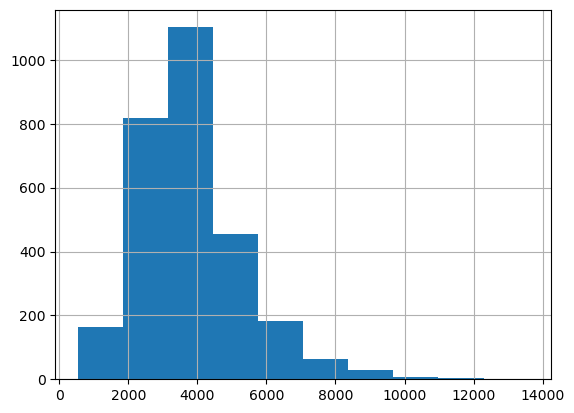

In [217]:
proteome_data.num_prots.hist()

In [215]:
proteome_data.to_csv(Path(inputs_dir, "ogt_sources/merged/proteome_data.csv"), index=None)

## IJSEM

In [25]:
ijsem_file = Path(inputs_dir, "ogt_sources/ijsem/IJSEM_pheno_db_v1.0.txt")
df = pd.read_csv(ijsem_file, sep='\t')
df.columns = ["Habitat", "Year", "DOI", "rRNA16S", "GC", "Oxygen", "Length", "Width", "Motility", "Spore", "MetabAssays", "Genus", "Species", "Strain", "pH_optimum", "pH_range", "Temp_optimum", "Temp_range", "Salt_optimum", "Salt_range", "Pigment", "Shape", "Aggregation", "FirstPage", "CultureCollection", "CarbonSubstrate", "Genome", "Gram", "Subhabitat", "Biolog"]
# df = df.replace('', np.nan).dropna(subset='Temperature')
df = df.replace('Not indicated', np.nan).dropna(subset="Temp_range")
print(len(df))
df.head(10)

4622


,Habitat,Year,DOI,rRNA16S,GC,Oxygen,Length,Width,Motility,Spore,...,Pigment,Shape,Aggregation,FirstPage,CultureCollection,CarbonSubstrate,Genome,Gram,Subhabitat,Biolog
0,"freshwater (river, lake, pond)",2008,10.1099/ijs.0.65700-0,60.2,DQ987877,aerobic,1.05,0.7,"motile, but unspecified structure",not indicated,...,yes,not indicated,not indicated,1705,CGMCC=1.6783|CECT=7303,"glucose, lactose, maltose, mannitol, mannose, ...",NaN,negative,NaN,No
1,soil,2006,10.1099/ijs.0.63862-0,200233,71,aerobic,NaN,NaN,non-motile,yes,...,yes,rod,chain,393,JCM12949|DSM44899,"arabinose, galactose, glucose, lactose, maltos...",NaN,positive,NaN,No
2,other,2009,10.1099/ijs.0.001123-0,,67,aerobic,NaN,NaN,not indicated,no,...,yes,rod,not indicated,102,LMG23361T|CCUG55526T,"adipate, adonitol, arabinose, caprate, citric ...",NaN,negative,sheep milk,No
3,soil,2009,10.1099/ijs.0.001123-0,,67,aerobic,NaN,NaN,not indicated,no,...,yes,rod,NaN,102,ATCC17760T|LMG22485T|CCUG55525T,"adipate, adonitol, arabinose, caprate, citric ...",NaN,negative,NaN,No
4,built environment,2005,10.1099/ijs.0.63649-0,AB043852,39.6,aerobic,2.5,0.35,flagella,yes,...,yes,rod,clump,2309,JCM9156T|DSM2522T,"cellobiose, fructose, glucose, lactose, maltos...",NaN,positive,NaN,Yes
5,built environment,2005,10.1099/ijs.0.63649-0,AB043858,34.4,aerobic,3.5,0.7,flagella,yes,...,yes,rod,clump,2309,JCM9157T|ATCC43226T,"arabinose, cellobiose, fructose, galactose, gl...",NaN,positive,NaN,Yes
6,other,2004,10.1099/ijs.0.03050-0,AB111849,30,NaN,18,0.24,flagella,NaN,...,NaN,rod,NaN,1649,JCM11958T|DSM16138T,NaN,NaN,NaN,hard tick,No
7,soil,2005,10.1099/ijs.0.02982-0,AB112081,69,aerobic,NaN,NaN,non-motile,yes,...,NaN,not indicated,chain,725,NBRC100142T|DSM44745T,"arabinose, galactose, glucose, maltose, mannit...",NaN,positive,NaN,No
8,other,2008,10.1099/ijs.0.65314-0,AB166879,63.5,facultative anaerobe,1.2-2,0.3-0.5,non-motile,no,...,yes,rod,chain,2141,KCTC12197|LMG23411,"3-hydroxybutyrate, acetate, adipate, adonitol,...",NaN,negative,sludge,No
9,wastewater,2005,10.1099/ijs.0.63459-0,AB180738,36.2,aerobic,3.5,0.4,non-motile,no,...,yes,rod,not indicated,747,KCTC12201T|IAM15099T,"glucose, maltose, mannose, N-acetylgulcosamine...",NaN,negative,NaN,No


In [32]:
# get the maximum growth temperature for each species
def get_max_temp(x):
    try:
        if '-' in x:
            x = float(x.split('-')[1])
        else:
            x = float(x.replace('<',''))
        return x
    except:
        # print("failed for ", x)
        return
    
df['Temp_max'] = df['Temp_range'].apply(get_max_temp)

In [34]:
# df = df.dropna(subset='Temp_max')
print(len(df))

4519


<AxesSubplot: >

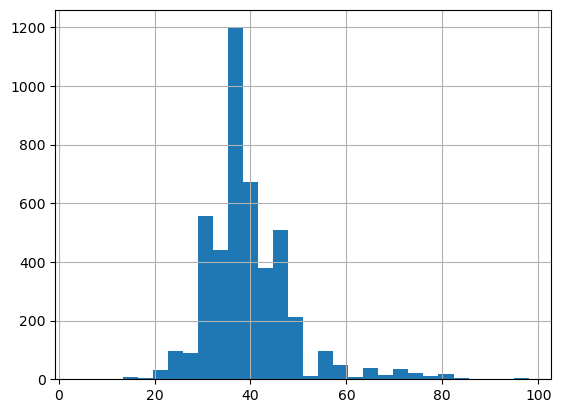

In [27]:
df['Temp_max'].hist(bins=30)

## BacDive

In [36]:
bacdive_file = "/projects/robustmicrob/jlaw/inputs/species/bacdive/bacdive.csv"
df = pd.read_csv(bacdive_file).ffill()
df = df.replace('', np.nan).dropna(subset='Temperature')
print(len(df))
df.head(10)

31428


,ID,designation_header,strain_number_header,is_type_strain_header,is_type_strain,species,Temperature
0,159652.0,R-68213,"DSM 105287, LMG 29911",1.0,1.0,Abditibacterium utsteinense,20
1,219.0,R-68213,"DSM 9849, ATCC 49176, CIP 103242, SC 10",1.0,1.0,Abiotrophia defectiva,37
2,164352.0,R-68213,"JCM 32769, KCTC 15747",1.0,1.0,Absicoccus porci,37
3,159837.0,OUC007,"KCTC 52933, MCCC 1K03450, JCM 32025",1.0,1.0,Abyssibacter profundi,10-45
4,159837.0,OUC007,"KCTC 52933, MCCC 1K03450, JCM 32025",1.0,1.0,Abyssibacter profundi,37
5,132558.0,OUC007,"DSM 29158, CCTCC AB 2014213, YIM M12140, JCM 3...",1.0,1.0,Abyssicoccus albus,28
6,164056.0,OUC007,"JCM 31420, KCTC 15524",1.0,1.0,Abyssisolibacter fermentans,30
7,132478.0,L81,"DSM 29592, JCM 30920",1.0,1.0,Vallitalea guaymasensis,15-42
8,132478.0,L81,"DSM 29592, JCM 30920",1.0,1.0,Vallitalea guaymasensis,37
9,24718.0,FYK2218,"DSM 28897, KCTC 12899, NBRC 101209",1.0,1.0,Acanthopleuribacter pedis,15-30


In [20]:
def fix_temperature(x):
    if '-' in x:
        x = x.split('-')[1]
    x = x.replace('>','').replace('<','')
    return x

df['Temperature'] = df.Temperature.apply(fix_temperature)
df = df.replace('', np.nan).dropna(subset='Temperature')
df['Temperature'] = df['Temperature'].astype(float)
df = df.drop(columns=['is_type_strain_header', 'is_type_strain', 'ID'])
df.head(5)

,designation_header,strain_number_header,species,Temperature
0,R-68213,"DSM 105287, LMG 29911",Abditibacterium utsteinense,20.0
1,R-68213,"DSM 9849, ATCC 49176, CIP 103242, SC 10",Abiotrophia defectiva,37.0
2,R-68213,"JCM 32769, KCTC 15747",Absicoccus porci,37.0
3,OUC007,"KCTC 52933, MCCC 1K03450, JCM 32025",Abyssibacter profundi,45.0
4,OUC007,"KCTC 52933, MCCC 1K03450, JCM 32025",Abyssibacter profundi,37.0


In [21]:
# merge species and keep the highest temperature
df = df.groupby('species').max()
df.head(5)

,designation_header,strain_number_header,Temperature
species,,,
Abditibacterium utsteinense,R-68213,"DSM 105287, LMG 29911",20.0
Abiotrophia defectiva,R-68213,"DSM 9849, ATCC 49176, CIP 103242, SC 10",37.0
Absicoccus porci,R-68213,"JCM 32769, KCTC 15747",37.0
Abyssibacter profundi,OUC007,"KCTC 52933, MCCC 1K03450, JCM 32025",45.0
Abyssicoccus albus,S31,"DSM 29158, CCTCC AB 2014213, YIM M12140, JCM 3...",40.0


<AxesSubplot: >

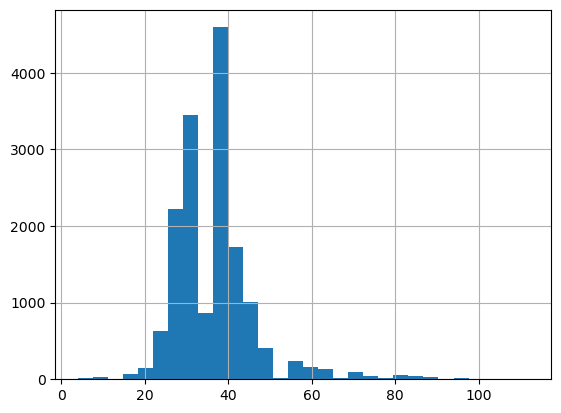

In [22]:
df.Temperature.hist(bins=30)

In [23]:
# hotprotein has 48 hyperthermophillic species
len(df[df.Temperature > 75])

173

In [24]:
df[df.Temperature > 75]

,designation_header,strain_number_header,Temperature
species,,,
Acidianus ambivalens,VR4,"DSM 3772, JCM 9191, LEI 10",80.0
Acidianus infernus,So4a,"DSM 3191, NBRC 106462, JCM 8955, IFO 15270, NB...",88.0
Acidilobus aceticus,1904,"DSM 11585, ATCC BAA 268, JCM 11320",80.0
Acidilobus saccharovorans,345-15,"DSM 16705, JCM 18335, VKM B-2471",80.0
Aeropyrum camini,SY1,"DSM 16960, ATCC BAA 758, JCM 12091",97.0
...,...,...,...
Thermus composti,K-39,"DSM 21686, JCM 19902, NCAIM B 02340",80.0
Thermus islandicus,RF-4,"DSM 21543, JCM 19901, PRI 3838, ATCC BAA 1677",79.0
Vulcanisaeta distributa,IC-017,"DSM 14429, JCM 11212, NBRC 100878",90.0


In [25]:
df.sort_values('Temperature', ascending=False).to_csv("/projects/robustmicrob/jlaw/inputs/species/bacdive/bacdive_parsed.csv")

### Down-select the species favoring those with reference proteomes
There are too many bacteria with max growth < 40. Need to downsample those

In [82]:
data_dir = "/projects/robustmicrob/jlaw/inputs/species/bacdive"
ref_prot_file = f"{data_dir}/reference_out.tsv"
other_prot_file = f"{data_dir}/other_out.tsv"
proteome_data = pd.read_table(ref_prot_file, names=['species', 'proteome_id', 'organism', 'taxon_id', 'num_prots'])
proteome_data_other = pd.read_table(other_prot_file, names=['species', 'proteome_id', 'organism', 'taxon_id', 'num_prots'])
proteome_data['type'] = 'reference'
proteome_data_other['type'] = 'other'
print(len(proteome_data), len(proteome_data_other))
proteome_data = pd.concat([proteome_data, proteome_data_other])
print(len(proteome_data))
proteome_data.head(2)

5202 0
5202


,species,proteome_id,organism,taxon_id,num_prots,type
0,Pyrolobus fumarii,UP000001037,Pyrolobus fumarii (strain DSM 11204 / 1A),694429,1967,reference
1,Aeropyrum pernix,UP000002518,Aeropyrum pernix (strain ATCC 700893 / DSM 118...,272557,1700,reference


In [29]:
proteome_data[proteome_data.type == 'reference'].species.value_counts()

Streptomyces sp.                       157
Sphingomonas sp.                        39
Lachnospiraceae bacterium               36
Bacillus sp.                            36
Prevotella sp.                          35
                                      ... 
Sandarakinorhabdus cyanobacteriorum      1
Lactococcus fujiensis                    1
Salmonella enterica subsp. arizonae      1
Lactonifactor longoviformis              1
Octadecabacter arcticus                  1
Name: species, Length: 4725, dtype: int64

In [83]:
# # for proteomes with duplicate species, choose a proteome with an average # proteins
proteome_data = proteome_data.sort_values('num_prots')
representatives = proteome_data[['species', 'proteome_id']].groupby(['species'])['proteome_id'].agg(lambda x: x[int(len(x) / 2)] if isinstance(x, np.ndarray) else x)
representatives = representatives.apply(lambda x: x[int(len(x) / 2)] if isinstance(x, np.ndarray) else x)
print(len(representatives))
proteome_data = proteome_data[proteome_data['proteome_id'].isin(representatives.reset_index().proteome_id)]
proteome_data = proteome_data.drop_duplicates(subset='proteome_id')
print(len(proteome_data))
# proteome_data.head(2)
# representatives

4725
4716


In [ ]:
proteome_data[proteome_data.species == "Streptomyces sp."]

,species,proteome_id,organism,taxon_id,num_prots,type
4238,Streptomyces sp.,UP000035653,Streptomyces sp. Mg1,465541,7098,reference


In [85]:
proteome_data = proteome_data.set_index('species')
proteome_data['Tmax'] = df.Temperature
proteome_data.head(2)

,proteome_id,organism,taxon_id,num_prots,type,Tmax
species,,,,,,
Photobacterium damselae,UP000242611,Photobacterium damselae subsp. piscicida DI21,1200302,110,reference,26.0
Actinospica robiniae,UP000019485,Actinospica robiniae DSM 44927,479430,191,reference,33.0


In [246]:
# I downloaded the 'reference' and 'other' proteome IDs from uniprot.
# First split the species into bins
hist, bin_edges = np.histogram(proteome_data.Tmax, bins=np.arange(0,proteome_data.Tmax.max()+5,5))
hist, bin_edges

(array([  0,   0,   3,   9,  13,  77, 313, 748, 628, 397, 139,  98,  64,
         74,  58,  47,  40,  28,  37,  29,  18,   2,   3]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115.]))

In [ ]:
proteome_data.Tmax.max()

103.0

In [ ]:
df.sample(

In [106]:
# randomly sample 50 species from each bin
max_per_bin = 50
subsampled = []
for i in range(len(bin_edges)-1):
    subsample = proteome_data[
            (proteome_data.Tmax >= bin_edges[i]) & 
            (proteome_data.Tmax < bin_edges[i+1])]
    if len(subsample) > max_per_bin:
        subsample = subsample.sample(max_per_bin)
    subsampled.append(subsample)
subsampled = pd.concat(subsampled)
print(len(subsampled))
subsampled.head(2)

621


,proteome_id,organism,taxon_id,num_prots,type,Tmax
species,,,,,,
Polaribacter irgensii,UP000003053,Polaribacter irgensii 23-P,313594,2556,reference,4.0
Octadecabacter arcticus,UP000004688,Octadecabacter arcticus 238,391616,4331,reference,4.0


In [89]:
len(proteome_data[proteome_data.Tmax > 70])

67

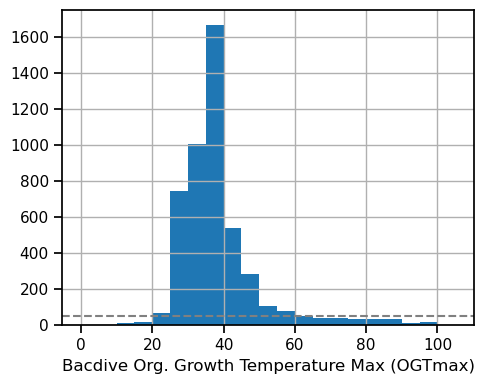

In [272]:
f, ax = plt.subplots(figsize=(5,4))
ax = proteome_data.Tmax.hist(bins=bin_edges)
ax.axhline(50, ls='--', c='gray')
ax.set_xlabel("Bacdive Org. Growth Temperature Max (OGTmax)")
plt.tight_layout()

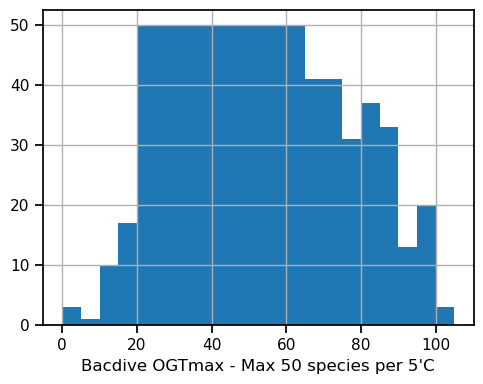

In [273]:
f, ax = plt.subplots(figsize=(5,4))
ax = subsampled.Tmax.hist(bins=bin_edges, ax=ax)
ax.set_xlabel("Bacdive OGTmax - Max 50 species per 5'C")
plt.tight_layout()

In [109]:
t_ranges = {'hyperthermophillic': (75,110),
 'thermophillic': (45, 75),
 'mesophillic': (25, 45),
 'cryophillic': (0, 25)}
for t_type, (low, high) in t_ranges.items():
    print(t_type, len(subsampled[(subsampled.Tmax > low) & 
            (subsampled.Tmax <= high)]))

hyperthermophillic 56
thermophillic 246
mesophillic 223
cryophillic 96


In [122]:
# supplement non-full bins with 'other' proteomes
supp_species = []
# skip the first few bins
for i in range(5, len(bin_edges)-1):
    low, high = bin_edges[i:i+2]
    num_species = len(subsampled[(subsampled.Tmax >= low) & 
            (subsampled.Tmax < high)])
    if num_species < max_per_bin:
        subsample = df[(df.Temperature >= low) & 
                       (df.Temperature < high)]
        n = max_per_bin - num_species
        n = len(subsample) if len(subsample) < n else n
        print(low, high, num_species, n)
        supp_species.append(subsample.sample(n))

supp_species = pd.concat(supp_species)
print(len(supp_species))
supp_species.head(2)

65.0 70.0 39 11
70.0 75.0 37 13
75.0 80.0 15 35
80.0 85.0 21 29
85.0 90.0 13 37
90.0 95.0 4 18
95.0 100.0 9 24
100.0 105.0 2 3
170


,designation_header,strain_number_header,Temperature
species,,,
Thermohalobacter berrensis,IC-189,"DSM 26700, CNCM 105955, CTT 3",65.0
Ureibacillus composti,HC145,"DSM 17951, KACC 11361",65.0


In [124]:
supp_species.to_csv(f'{data_dir}/species_sets/supp_species.tsv', sep='\t')

In [137]:
supp_ps = pd.read_table(f"{data_dir}/species_sets/supp_species_other_proteomes.tsv",
                        names=['species', 'proteome_id', 'organism', 'taxon_id', 'num_prots'])
supp_ps['type'] = 'other'
print(len(supp_ps))
supp_ps.head(2)

114


,species,proteome_id,organism,taxon_id,num_prots,type
0,Spirochaeta thermophila,UP000001296,Spirochaeta thermophila (strain ATCC 49972 / D...,665571,2199,other
1,Thermoanaerobacter wiegelii,UP000008276,Thermoanaerobacter wiegelii Rt8.B1,697303,2487,other


In [130]:
supp_ps.species.value_counts()

Geobacillus stearothermophilus       7
Geobacillus thermoleovorans          3
Geobacillus kaustophilus             3
Thermococcus paralvinellae           3
Thermococcus litoralis               3
                                    ..
Thermococcus cleftensis              1
Dictyoglomus thermophilum            1
Thermococcus barossii                1
Methanocaldococcus bathoardescens    1
Aeropyrum pernix                     1
Name: species, Length: 81, dtype: int64

In [138]:
# # for proteomes with duplicate species, choose a proteome with an average # proteins
supp_ps = supp_ps.sort_values('num_prots')
representatives = supp_ps[['species', 'proteome_id']].groupby(['species'])['proteome_id'].agg(lambda x: x[int(len(x) / 2)] if isinstance(x, np.ndarray) else x)
representatives = representatives.apply(lambda x: x[int(len(x) / 2)] if isinstance(x, np.ndarray) else x)
supp_ps = supp_ps[supp_ps['proteome_id'].isin(representatives.reset_index().proteome_id)]
print(len(supp_ps), len(representatives))
supp_ps = supp_ps.drop_duplicates(subset='proteome_id')
print(len(supp_ps))
# proteome_data.head(2)
# representatives

81 81
81


In [139]:
supp_ps = supp_ps.set_index('species')
supp_ps['Tmax'] = supp_species.Temperature
supp_ps.head(2)

,proteome_id,organism,taxon_id,num_prots,type,Tmax
species,,,,,,
Archaeoglobus veneficus,UP000885652,Archaeoglobus veneficus,58290,1040,other,75.0
Methanocaldococcus jannaschii,UP000645676,Methanocaldococcus jannaschii,2190,1197,other,80.0


In [140]:
proteome_data.head(2)

,proteome_id,organism,taxon_id,num_prots,type,Tmax
species,,,,,,
Photobacterium damselae,UP000242611,Photobacterium damselae subsp. piscicida DI21,1200302,110,reference,26.0
Actinospica robiniae,UP000019485,Actinospica robiniae DSM 44927,479430,191,reference,33.0


In [143]:
subsampled = pd.concat([subsampled, supp_ps])

In [165]:
subsampled = subsampled.drop_duplicates(subset='taxon_id')

In [144]:
t_ranges = {'hyperthermophillic': (75,110),
 'thermophillic': (45, 75),
 'mesophillic': (25, 45),
 'cryophillic': (0, 25)}
for t_type, (low, high) in t_ranges.items():
    print(t_type, len(subsampled[(subsampled.Tmax > low) & 
            (subsampled.Tmax <= high)]))

hyperthermophillic 118
thermophillic 265
mesophillic 223
cryophillic 96


<AxesSubplot: >

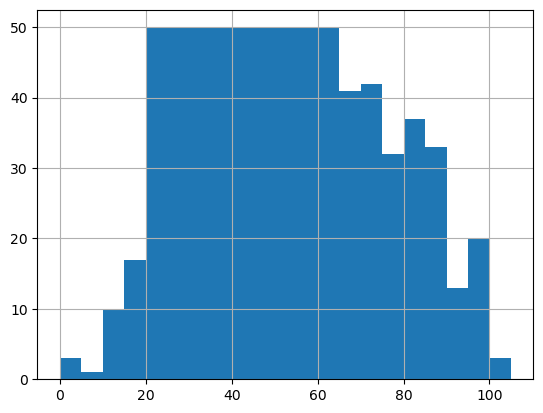

In [145]:
subsampled.Tmax.hist(bins=bin_edges)

### Download these proteomes
I had started downloading all the reference proteomes, but it was taking much too long

In [147]:
so_far = pd.read_csv(f"{data_dir}/downloaded_so_far.txt")
so_far.head(2)

,num_prots,taxon_id
0,2813,1004304
1,1811,1006576


In [149]:
len(so_far)

573

In [169]:
len(subsampled[subsampled.taxon_id.isin(so_far.taxon_id)])

326

In [170]:
len(subsampled[~subsampled.taxon_id.isin(so_far.taxon_id)])

374

In [155]:
proteome_data[proteome_data.taxon_id == 2034155]

,proteome_id,organism,taxon_id,num_prots,type,Tmax
species,,,,,,
Serratia oryzae,UP000216021,Serratia oryzae,2034155,4282,reference,45.0


In [168]:
subsampled[~subsampled.taxon_id.isin(so_far.taxon_id)].to_csv(f"{data_dir}/species_sets/proteomes_to_download.tsv", sep='\t')

In [172]:
subsampled.to_csv("bacdive_uniprot_subsampled_by_T_bins.csv")

### Re-sample proteomes
- Rather than just take the highest OGT for each uniref50 cluster, take representatives from bins

In [220]:
subsampled = pd.read_csv("/projects/robustmicrob/jlaw/projects/prot_stability_engineering/notebooks/testing/bacdive_uniprot_subsampled_by_T_bins.csv")

In [222]:
data_dir = "/projects/robustmicrob/jlaw/inputs/species/bacdive"

In [223]:
df_seqs = pd.read_table(f"{data_dir}/proteomes/proteome_sequences.tsv.gz")
print(len(df_seqs))
df_seqs = df_seqs[df_seqs['Organism (ID)'].isin(subsampled.taxon_id)]
print(len(df_seqs))

3170799
2299499


In [182]:
df_seqs.head(2)

,Entry,Reviewed,Length,Organism (ID),Sequence
0,G0EEL0,unreviewed,1219,694429,MAKLTLLYEAGCPNCRGRIDEERLIKGLPCWECLPLLPEAERYLSG...
1,G0EHD7,unreviewed,535,694429,MVKYVFVTGGVLSSVGKGITTASIGLLLKSRGYNVTAIKIDPYINV...


In [224]:
df_so_far = subsampled[subsampled.taxon_id.isin(df_seqs['Organism (ID)'].unique())]
len(subsampled), len(df_so_far)

(700, 700)

In [225]:
df_seqs['Organism (ID)'].value_counts()

1291556    11276
1073253    10304
2530368     9016
1283301     9009
1287878     8953
           ...  
1505727     1238
334771      1235
2190        1197
58290       1040
342610       402
Name: Organism (ID), Length: 700, dtype: int64

In [226]:
df_seqs = df_seqs[(df_seqs.Length > 50) & (df_seqs.Length < 1500)]
print(len(df_seqs))

2260674


In [227]:
import re
aa_checker = re.compile('^[acdefghiklmnpqrstvwy]*$', re.I)
df_seqs = df_seqs[df_seqs.Sequence.apply(lambda seq: aa_checker.search(seq) is not None)]
print(f"removing sequences with non-natural AAs: {len(df_seqs)} remaining")

removing sequences with non-natural AAs: 2259681 remaining


In [228]:
# remove duplicate rows
df_seqs = df_seqs.drop_duplicates(subset="Entry")
print(len(df_seqs))

2257147


In [264]:
df_seqs.to_csv(f"{data_dir}/proteomes/proteome_sequences_subsampled.tsv.gz", sep='\t', index=None)

<AxesSubplot: >

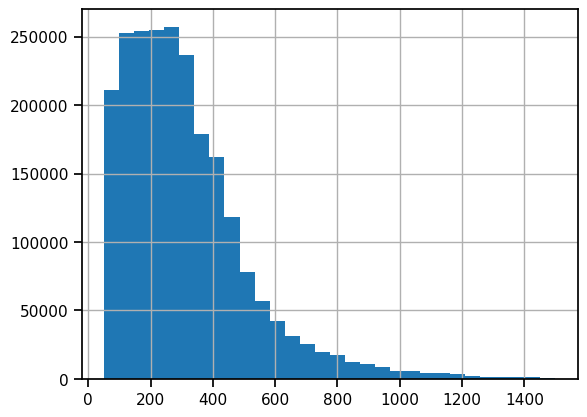

In [237]:
df_seqs.Length.hist(bins=30)

In [252]:
# combine the other databases as well
# These are sequences with OGTmax > 50
df_seqs_merged = pd.read_table("/projects/robustmicrob/jlaw/inputs/ogt_sources/merged/proteome_sequences.tsv.gz")
df_seqs_merged.head(2)

,Entry,Organism (ID),Sequence
0,Q2HEW5,306901,MSDNDDEWNGFSDDNGEDDGPPEPGRPSQIDGQPWDVPDSALLQGD...
1,Q2H0D3,306901,MDVVNSTARAAVTSATAVTAVTGTGDRHPNPLSSAVAAASDVANAH...


In [253]:
df_seqs.head(2)

,Entry,Reviewed,Length,Organism (ID),Sequence
0,G0EEL0,unreviewed,1219,694429,MAKLTLLYEAGCPNCRGRIDEERLIKGLPCWECLPLLPEAERYLSG...
1,G0EHD7,unreviewed,535,694429,MVKYVFVTGGVLSSVGKGITTASIGLLLKSRGYNVTAIKIDPYINV...


In [256]:
df_seqs = pd.concat([df_seqs, df_seqs_merged])

### Cluster the sequences from the species using UniRef90
- For each sequence, choose the representative sequence as the one with the highest OGTmax
- First, plot the range of OGTmax values for each UniRef90 cluster, as well as their size

In [257]:
import gzip
from tqdm import tqdm

uniprot_ids = set(df_seqs.Entry.values)
mapping_file = "/projects/robustmicrob/jlaw/inputs/uniprot/2023-05/uniref90_50_mapping.tab.gz"
# mapping_file = f"{data_dir}/proteomes/uniref90_example.txt"
# df_mapping = pd.read_table(mapping_file, names=['accession', 'uniref90', 'uniref50'])
mapping_rows = []
with gzip.open(mapping_file, 'r') as f:
    for line in tqdm(f, total=249877975):
        line = line.decode().rstrip().split('\t')
        if line[0] in uniprot_ids:
            mapping_rows.append(line)

df_mapping = pd.DataFrame(mapping_rows, columns=['accession', 'uniref90', 'uniref50'])
df_mapping.head(2)

100%|████████████████████████████████████████████████████████████████████████████████████████| 249877975/249877975 [05:11<00:00, 801901.25it/s]


,accession,uniref90,uniref50
0,Q9V2L2,UniRef90_Q9V2L2,UniRef50_Q9V2L2
1,Q8U4R3,UniRef90_Q8U4R3,UniRef50_Q8U4R3


In [247]:
df_mapping = df_mapping[df_mapping.accession.isin(df_seqs.Entry)]
print(len(df_mapping), len(df_seqs))

2257147 2259681


In [232]:
# df_mapping.to_csv(f"{data_dir}/proteomes/uniref90_50_mapping.csv.gz")
df_mapping = pd.read_csv(f"{data_dir}/proteomes/uniref90_50_mapping.csv.gz", index_col=0)
df_mapping.head(2)

,accession,uniref90,uniref50
0,Q9V2L2,UniRef90_Q9V2L2,UniRef50_Q9V2L2
1,Q8U4R3,UniRef90_Q8U4R3,UniRef50_Q8U4R3


In [233]:
# add the temperature to df_mapping
taxon_ogtmax = dict(zip(subsampled['taxon_id'], subsampled['Tmax']))
uniprot_to_taxon = dict(zip(df_seqs['Entry'], df_seqs['Organism (ID)']))
df_mapping['OGTmax'] = df_mapping.accession.apply(lambda x: taxon_ogtmax[uniprot_to_taxon[x]])
# df_mapping['OGTmax'] = df_mapping.accession.apply(lambda x: np.random.randint(0,100))
df_mapping.head(2)

,accession,uniref90,uniref50,OGTmax
0,Q9V2L2,UniRef90_Q9V2L2,UniRef50_Q9V2L2,95.0
1,Q8U4R3,UniRef90_Q8U4R3,UniRef50_Q8U4R3,97.0


In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

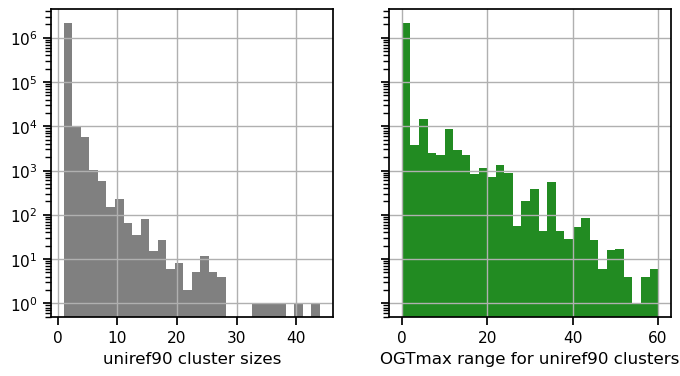

In [250]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(8,4))
df_mapping.groupby('uniref90')['OGTmax'].count().hist(bins=30, color='gray', ax=ax1)
ax1.set_xlabel("uniref90 cluster sizes")

clust_t_range = df_mapping.groupby('uniref90')['OGTmax'].agg((max, min))
clust_t_range['OGTmax_range'] = clust_t_range['max'] - clust_t_range['min']
clust_t_range['OGTmax_range'].hist(bins=30, color='forestgreen', ax=ax2)
ax2.set_xlabel("OGTmax range for uniref90 clusters")

plt.yscale('log')
# sns.jointplot(clust_t_range, x='max', y='min', alpha=0.5)

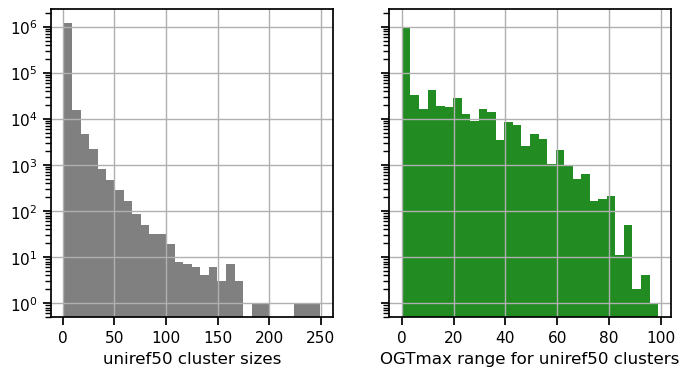

In [252]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(8,4))
df_mapping.groupby('uniref50')['OGTmax'].count().hist(bins=30, color='gray', ax=ax1)
ax1.set_xlabel("uniref50 cluster sizes")

clust_t_range = df_mapping.groupby('uniref50')['OGTmax'].agg((max, min))
clust_t_range['OGTmax_range'] = clust_t_range['max'] - clust_t_range['min']
clust_t_range['OGTmax_range'].hist(bins=30, color='forestgreen', ax=ax2)
ax2.set_xlabel("OGTmax range for uniref50 clusters")

plt.yscale('log')
# sns.jointplot(clust_t_range, x='max', y='min', alpha=0.5)

In [251]:
# for each uniref90 cluster, keep the sequence with the largest OGTmax
df_clust_rep = df_mapping.loc[df_mapping.groupby('uniref90')['OGTmax'].idxmax()]
print(len(df_mapping), len(df_clust_rep))

2257147 2146740


In [234]:
df_mapping.head(2)

,accession,uniref90,uniref50,OGTmax
0,Q9V2L2,UniRef90_Q9V2L2,UniRef50_Q9V2L2,95.0
1,Q8U4R3,UniRef90_Q8U4R3,UniRef50_Q8U4R3,97.0


In [242]:
df_clust50_rep = pd.DataFrame()
# bin the prots by temperature (10C bins)
# for each uniref50 cluster, keep the sequence with the largest OGTmax
for tlow, thigh in tqdm(list(zip(list(range(0,100,10)), list(range(10,100,10)) + [150]))):
    df_bin = df_mapping[(df_mapping.OGTmax > tlow) & 
                        (df_mapping.OGTmax <= thigh)]
    # TODO choose the cluster representative if its in the bin(?)
    df_clust50_rep = pd.concat([df_clust50_rep, 
                                df_bin.loc[df_bin.groupby('uniref50')['OGTmax'].idxmax()]
                               ])
print(len(df_mapping), len(df_clust50_rep))
df_clust50_rep = df_clust50_rep.drop_duplicates(subset='accession')
print(len(df_mapping), len(df_clust50_rep))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:52<00:00, 11.21s/it]


2257147 1598682
2257147 1598682


Text(0.5, 0, 'Sequence OGTmax after clustering')

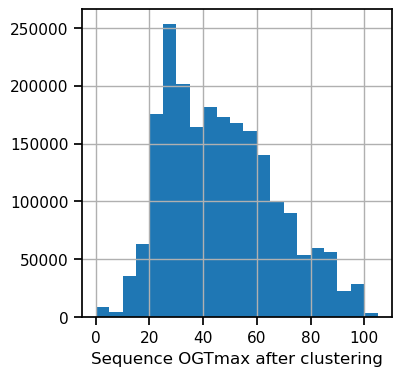

In [254]:
f, ax = plt.subplots(figsize=(4,4))
df_clust_rep.OGTmax.hist(bins=bin_edges)
ax.set_xlabel("Sequence OGTmax after clustering")

In [244]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Sequence OGTmax after clustering')

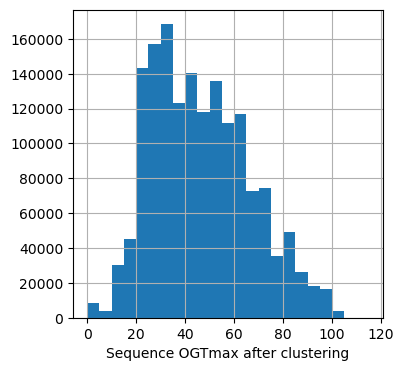

In [247]:
f, ax = plt.subplots(figsize=(4,4))
df_clust50_rep.OGTmax.hist(bins=bin_edges)
ax.set_xlabel("Sequence OGTmax after clustering")

In [ ]:
df_clust_rep = df_clust_rep.set_index('accession')
df_clust_rep['sequence'] = df_seqs.set_index('Entry')['Sequence']
df_clust_rep.to_csv(f"{data_dir}/bacdive_clustered_seqs.csv.gz")

In [250]:
df_clust50_rep = df_clust50_rep.set_index('accession')
df_clust50_rep['sequence'] = df_seqs.set_index('Entry')['Sequence']
df_clust50_rep.to_csv(f"{data_dir}/bacdive_10bins_clustered50_seqs.csv.gz")

Now build the esm2 embeddings

## Pre-train with OGTmax (organism growth temperature - max)

In [266]:
def read_embeddings(embed_file, sequence_idx_file):
    """ Read embeddings stored in an npz file
    Get the sequences at each index from the *sequence_idx_file
    """
    embeddings = np.load(embed_file, allow_pickle=True)['arr_0']
    sequences = pd.read_csv(sequence_idx_file)
    print(f"{len(embeddings) = } read from {embed_file}")
    print(f"{len(sequences) = } read from {sequence_idx_file}")
    return embeddings, sequences

In [ ]:
all_embeddings = []
all_seqs = []
for i in range(2):
    embed_file = f"{data_dir}/embeddings/20230516_embeddings_esm2_t33_650M_UR50D_{i}.npz"
    seq_idx_file = f"{data_dir}/embeddings/20230516_embeddings_seqs_{i}.csv"
    embeddings, seqs = read_embeddings(embed_file, seq_idx_file)
    all_embeddings.append(embeddings)
    all_seqs.append(seqs)
    
all_embeddings = np.vstack(all_embeddings)
print(all_embeddings.shape)
seqs = pd.concat(all_seqs)
print(seqs.shape)